In [118]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


In [75]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb


In [76]:
# For handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline # Use this for imbalanced pipelines


In [77]:
# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width',1000)



In [78]:
# --- Data Loading ---
df_credit = pd.read_csv('credit_card (1).csv')
df_demographics = pd.read_csv('customer (1).csv')

In [79]:
df_credit.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [80]:
df_demographics.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


## Section 2: Data Merging and Initial Exploration


In [81]:
df=pd.merge(df_credit,df_demographics,on='Client_Num',how='inner')

In [82]:
df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [83]:
df.shape

(10108, 32)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client_Num               10108 non-null  int64  
 1   Card_Category            10108 non-null  object 
 2   Annual_Fees              10108 non-null  int64  
 3   Activation_30_Days       10108 non-null  int64  
 4   Customer_Acq_Cost        10108 non-null  int64  
 5   Week_Start_Date          10108 non-null  object 
 6   Week_Num                 10108 non-null  object 
 7   Qtr                      10108 non-null  object 
 8   current_year             10108 non-null  int64  
 9   Credit_Limit             10108 non-null  float64
 10  Total_Revolving_Bal      10108 non-null  int64  
 11  Total_Trans_Amt          10108 non-null  int64  
 12  Total_Trans_Vol          10108 non-null  int64  
 13  Avg_Utilization_Ratio    10108 non-null  float64
 14  Use Chip              

In [85]:
df.describe(include='all')

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108,10108.000000,10108.000000,10108.000000,10108,10108,10108,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108,10108,10108.000000,10108.000000,10108.000000,10108,10108.000000,10108,10108,10108,10108.000000,10108,10108,10108,10108,10108,10108.000000,10108.000000
unique,NaN,4,NaN,NaN,NaN,52,52,4,NaN,NaN,NaN,NaN,NaN,NaN,3,6,NaN,NaN,NaN,2,NaN,6,3,28,NaN,2,2,2,3,6,NaN,NaN
top,NaN,Blue,NaN,NaN,NaN,02-07-2023,Week-27,Q2,NaN,NaN,NaN,NaN,NaN,NaN,Swipe,Bills,NaN,NaN,NaN,F,NaN,Graduate,Married,CA,NaN,no,no,no,cellular,Selfemployeed,NaN,NaN
freq,NaN,9214,NaN,NaN,NaN,195,195,2535,NaN,NaN,NaN,NaN,NaN,NaN,7101,2970,NaN,NaN,NaN,5880,NaN,4134,5128,2468,NaN,6044,5390,8822,7457,2575,NaN,NaN
mean,7.390104e+08,NaN,291.849525,0.574693,96.254056,NaN,NaN,NaN,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,NaN,NaN,775.957878,0.060744,46.274436,NaN,2.345370,NaN,NaN,NaN,91663.071824,NaN,NaN,NaN,NaN,NaN,56976.101998,3.189256
std,3.673623e+07,NaN,118.339384,0.494414,25.768677,NaN,NaN,NaN,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,NaN,NaN,723.952320,0.238872,8.087876,NaN,1.299486,NaN,NaN,NaN,1693.093868,NaN,NaN,NaN,NaN,NaN,46183.718233,1.263101
min,7.080821e+08,NaN,95.000000,0.000000,40.000000,NaN,NaN,NaN,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,NaN,NaN,42.140000,0.000000,21.000000,NaN,0.000000,NaN,NaN,NaN,53010.000000,NaN,NaN,NaN,NaN,NaN,1250.000000,1.000000
25%,7.130267e+08,NaN,195.000000,0.000000,79.000000,NaN,NaN,NaN,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,NaN,NaN,326.150000,0.000000,41.000000,NaN,1.000000,NaN,NaN,NaN,91750.000000,NaN,NaN,NaN,NaN,NaN,22635.750000,2.000000
50%,7.179037e+08,NaN,295.000000,1.000000,95.000000,NaN,NaN,NaN,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,NaN,NaN,559.985000,0.000000,46.000000,NaN,2.000000,NaN,NaN,NaN,91750.000000,NaN,NaN,NaN,NaN,NaN,44768.500000,3.000000
75%,7.727989e+08,NaN,395.000000,1.000000,112.000000,NaN,NaN,NaN,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,NaN,NaN,962.685000,0.000000,52.000000,NaN,3.000000,NaN,NaN,NaN,91750.000000,NaN,NaN,NaN,NaN,NaN,76392.750000,4.000000


## Section 3: Data Cleaning and Preprocessing


In [86]:
# --- Handle Missing Values ---
print(df.isnull().sum())

Client_Num                 0
Card_Category              0
Annual_Fees                0
Activation_30_Days         0
Customer_Acq_Cost          0
Week_Start_Date            0
Week_Num                   0
Qtr                        0
current_year               0
Credit_Limit               0
Total_Revolving_Bal        0
Total_Trans_Amt            0
Total_Trans_Vol            0
Avg_Utilization_Ratio      0
Use Chip                   0
Exp Type                   0
Interest_Earned            0
Delinquent_Acc             0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64


In [87]:
# --- Handle Duplicates ---
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [88]:
# --- Convert Data Types if necessary ---
df['House_Owner']=df['House_Owner'].apply(lambda x:1 if x=="yes" else 0)
df['Car_Owner']=df['Car_Owner'].apply(lambda x:1 if x=="yes" else 0)
df['Personal_loan']=df['Personal_loan'].apply(lambda x:1 if x=="yes" else 0)

In [89]:
# Convert 'Week_Start_Date' to datetime for time-based calculations
df['Week_Start_Date'] = pd.to_datetime(df['Week_Start_Date'], dayfirst=True)

In [90]:
# --- Feature Engineering ---
# Age Group
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group']=pd.cut(df['Customer_Age'],bins=bins,labels=labels,right=False)

In [91]:
# Income Category
income_bins = [0, 25000, 50000, 75000, 100000, np.inf]
income_labels = ['<25K', '25K-50K', '50K-75K', '75K-100K', '100K+']
df['Income_Category']=pd.cut(df['Income'],bins=income_bins,labels=income_labels,right=False)

In [92]:
# Net Revenue per Customer
df['Net_Revenue_per_Customer']=df['Interest_Earned']+df['Annual_Fees']-df['Customer_Acq_Cost']

In [93]:
df['Net_Revenue_per_Customer'].head()

0    4506.21
1     406.44
2     236.58
3     336.40
4    1218.87
Name: Net_Revenue_per_Customer, dtype: float64

In [108]:
# Average Transaction Value
df['Avg_Transaction_Value']=df['Total_Trans_Amt']/df['Total_Trans_Vol'].replace(0,1)

In [109]:
df['Avg_Transaction_Value'].head()

0    136.477477
1     47.238095
2     62.913043
3     48.048780
4     74.050847
Name: Avg_Transaction_Value, dtype: float64

In [96]:
# Days since first transaction (or card issuance, if that date is available)
# Assuming 'Week_Start_Date' is the earliest relevant date for transaction history
# Find the overall min date for each client to consider it as 'card activation date' proxy
df['Card_Activation_Date_Proxy']=df.groupby('Client_Num')['Week_Start_Date'].transform('min')

In [113]:
df['Card_Activation_Date_Proxy'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Card_Activation_Date_Proxy, dtype: datetime64[ns]

In [102]:
df['Card_Age_Days']=(df['Week_Start_Date']-df['Card_Activation_Date_Proxy']).dt.days

In [116]:
df['Card_Age_Days'].head()

0    0
1    0
2    0
3    0
4    0
Name: Card_Age_Days, dtype: int64

In [111]:
print("\n--- Data after Feature Engineering ---\n\n")
print(df[['Client_Num', 'Customer_Age', 'Age_Group', 'Income', 'Income_Category',
          'Net_Revenue_per_Customer', 'Avg_Transaction_Value', 'Card_Age_Days']].head())


--- Data after Feature Engineering ---


   Client_Num  Customer_Age Age_Group  Income Income_Category  Net_Revenue_per_Customer  Avg_Transaction_Value  Card_Age_Days
0   708082083            24     18-25  202326           100K+                   4506.21             136.477477              0
1   708083283            62     56-65    5225            <25K                    406.44              47.238095              0
2   708084558            32     26-35   14235            <25K                    236.58              62.913043              0
3   708085458            38     36-45   45683         25K-50K                    336.40              48.048780              0
4   708086958            48     46-55   59279         50K-75K                   1218.87              74.050847              0


## Section 4: Exploratory Data Analysis (EDA)



In [119]:
# --- Set Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size


--- Univariate Analysis ---


C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


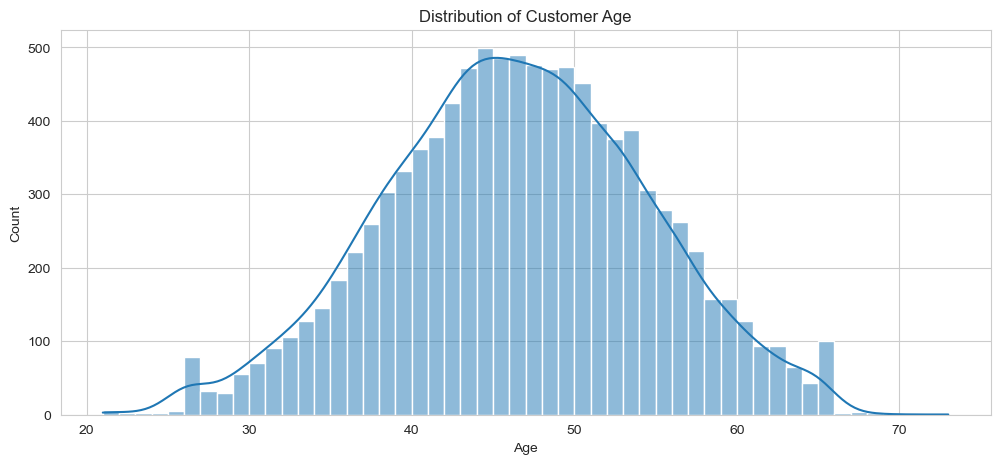

In [120]:
# --- Univariate Analysis ---
print("\n--- Univariate Analysis ---")
plt.figure(figsize=(12, 5))
sns.histplot(df['Customer_Age'],kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

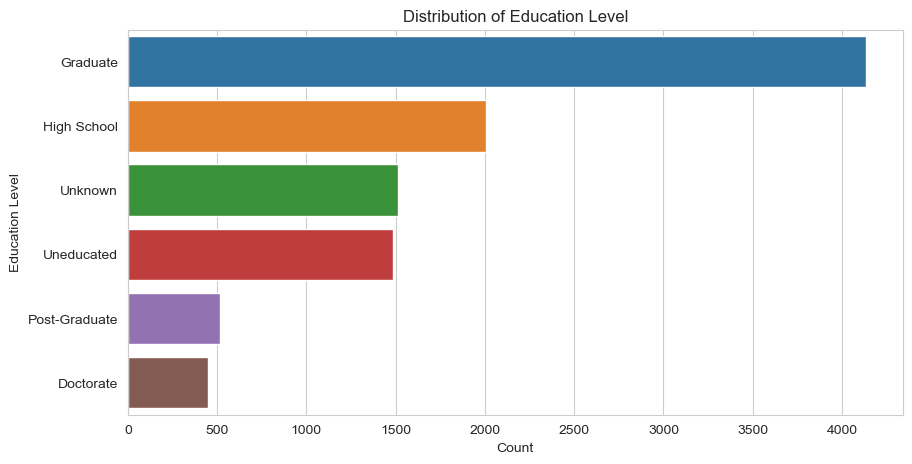

In [122]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Education_Level',data=df,order=df['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


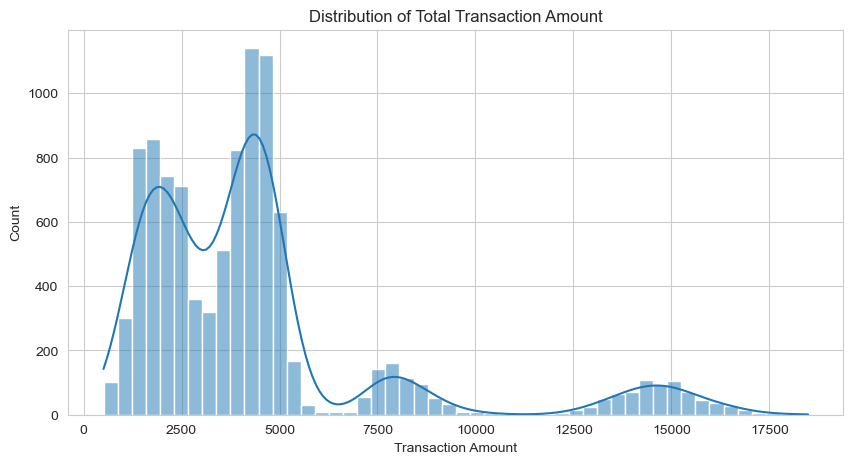

In [123]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Trans_Amt'],kde=True,bins=50)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


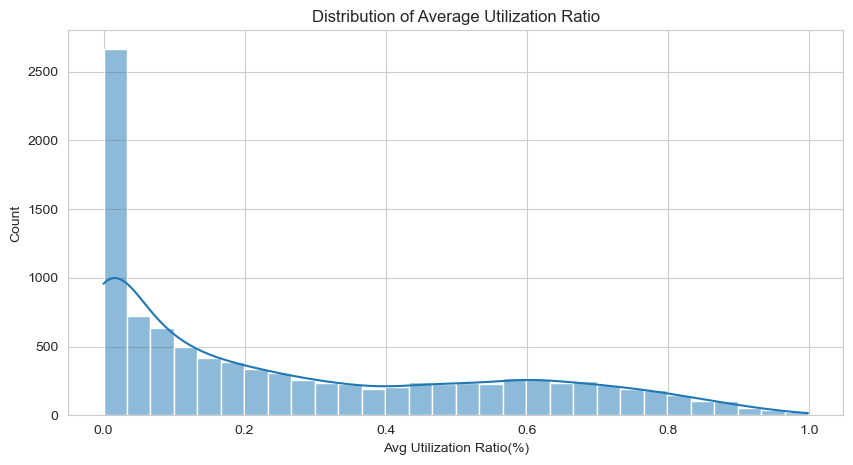

In [124]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Avg_Utilization_Ratio'],kde=True,bins=30)
plt.title('Distribution of Average Utilization Ratio')
plt.xlabel('Avg Utilization Ratio(%)')
plt.ylabel('Count')
plt.show()

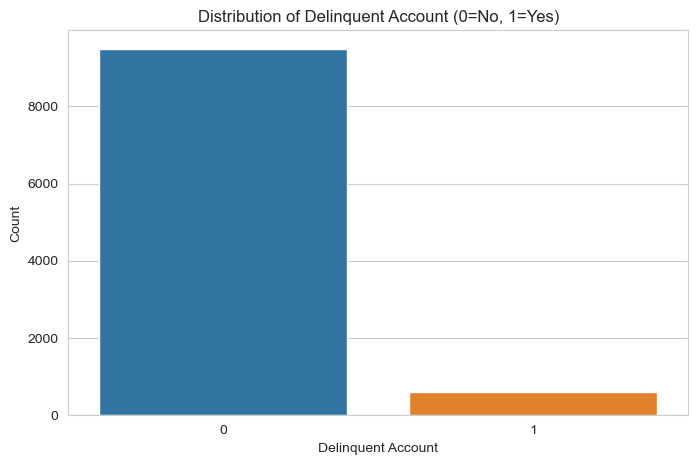

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Delinquent_Acc',data=df)
plt.title('Distribution of Delinquent Account (0=No, 1=Yes)')
plt.xlabel('Delinquent Account')
plt.ylabel('Count')
plt.show()


--- Bivariate Analysis ---


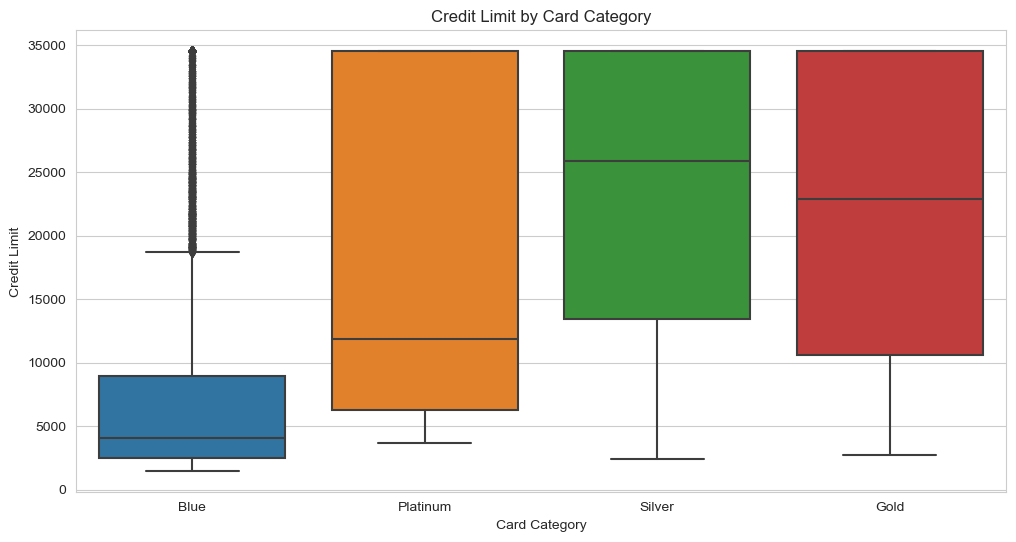

In [126]:
# --- Bivariate Analysis ---
print("\n--- Bivariate Analysis ---")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Card_Category'],y=df['Credit_Limit'],data=df)
plt.title('Credit Limit by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

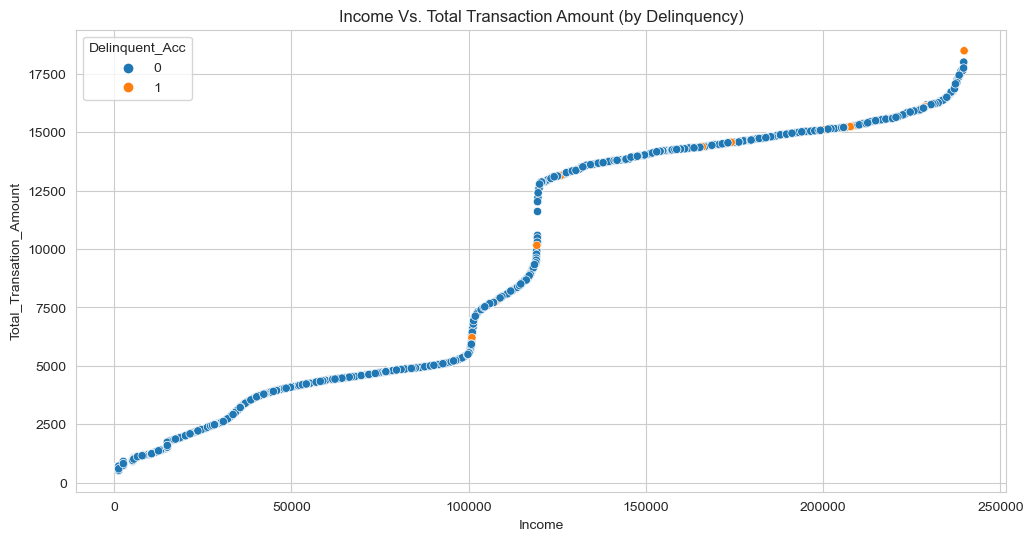

In [127]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income',y='Total_Trans_Amt',hue='Delinquent_Acc',data=df)
plt.title('Income Vs. Total Transaction Amount (by Delinquency)')
plt.xlabel('Income')
plt.ylabel('Total_Transation_Amount')
plt.show()

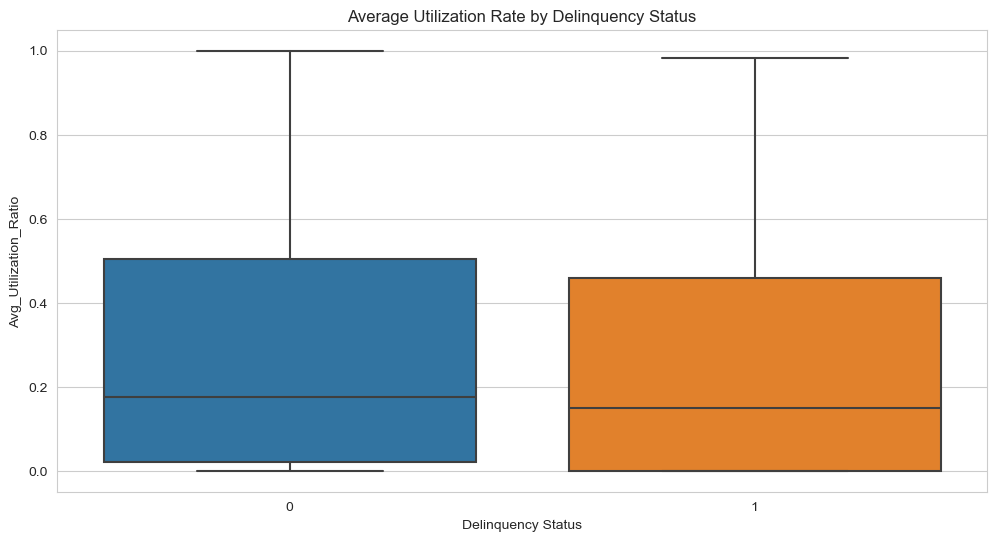

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Delinquent_Acc',y='Avg_Utilization_Ratio',data=df)
plt.title('Average Utilization Rate by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Avg_Utilization_Ratio')
plt.show()

C:\Users\neeraj\AppData\Local\Temp\ipykernel_18592\2414973900.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education_Level',y='Net_Revenue_per_Customer',data=df,estimator=np.mean,ci=None)


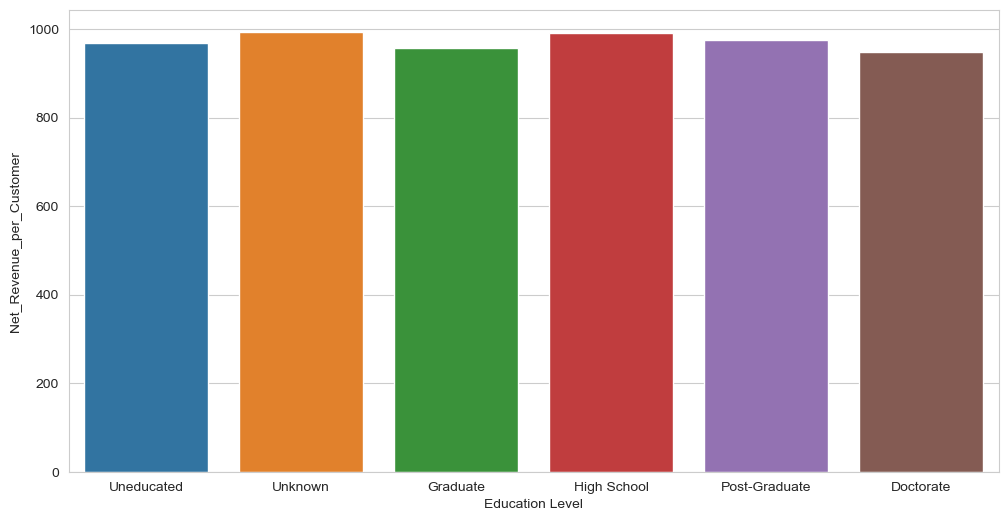

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Education_Level',y='Net_Revenue_per_Customer',data=df,estimator=np.mean,ci=None)
plt.xlabel('Education Level')
plt.ylabel('Net_Revenue_per_Customer')
plt.show()

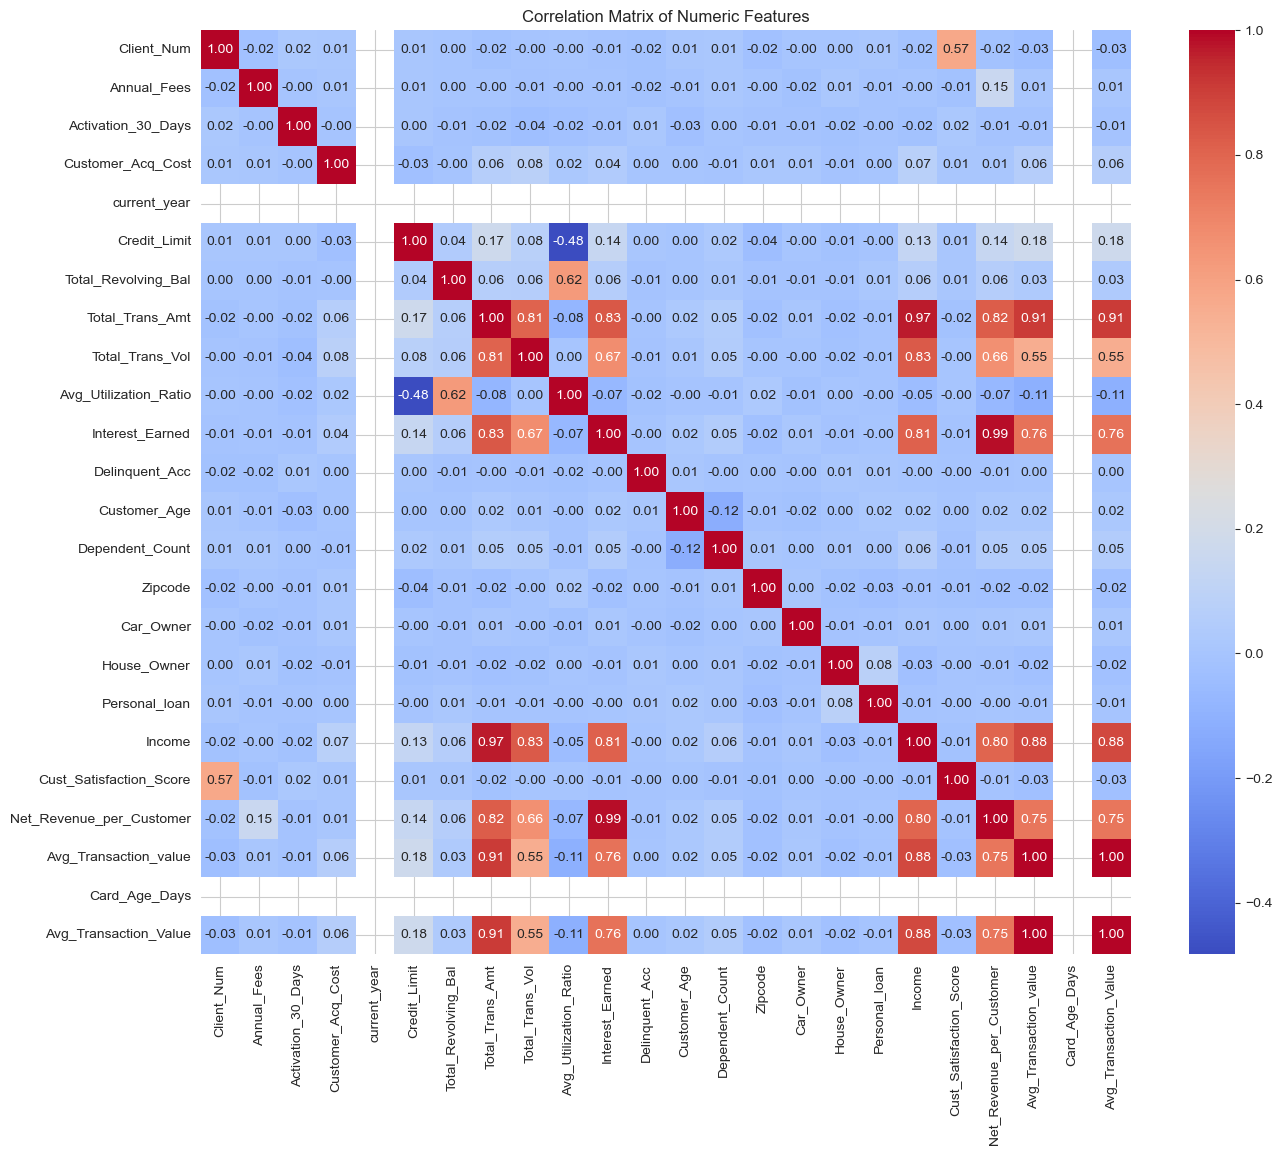

In [134]:
# --- Correlation Heatmap ---
plt.figure(figsize=(15, 12))
numeric_cols=df.select_dtypes(include=np.number).columns
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### current_year is constant for all rows in dataset (all values = 2023).

In [135]:
# Time series analysis (Example: monthly spending trends)
df['Month_Year'] = df['Week_Start_Date'].dt.to_period('M')
monthly_spending = df.groupby('Month_Year')['Total_Trans_Amt'].sum().reset_index()
monthly_spending['Month_Year'] = monthly_spending['Month_Year'].astype(str) # Convert Period to string for plotting


C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


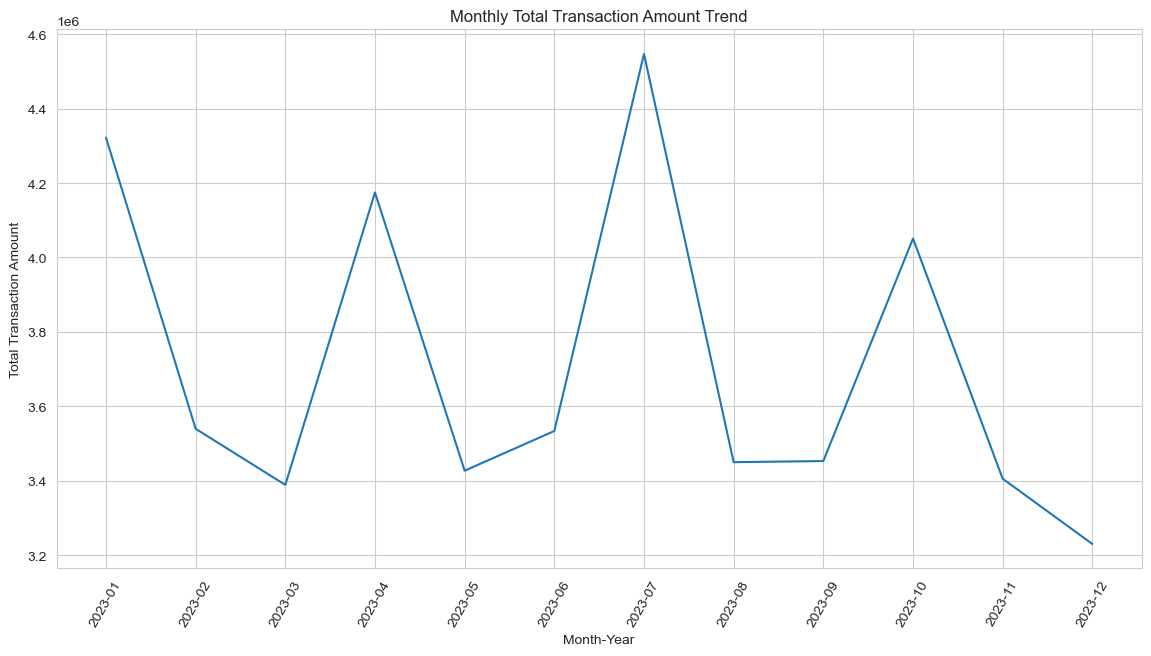

In [136]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month_Year', y='Total_Trans_Amt', data=monthly_spending)
plt.title('Monthly Total Transaction Amount Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=60)
plt.show()

Categorical features: ['Card_Category', 'Week_Num', 'Qtr', 'Use Chip', 'Exp Type', 'Gender', 'Education_Level', 'Marital_Status', 'state_cd', 'contact', 'Customer_Job', 'Age_Group', 'Income_Category']
Numerical features: ['Annual_Fees', 'Activation_30_Days', 'Customer_Acq_Cost', 'current_year', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio', 'Interest_Earned', 'Customer_Age', 'Dependent_Count', 'Zipcode', 'Car_Owner', 'House_Owner', 'Personal_loan', 'Income', 'Cust_Satisfaction_Score', 'Net_Revenue_per_Customer', 'Avg_Transaction_value', 'Card_Age_Days', 'Avg_Transaction_Value']

Training set shape: (7581, 35), Target shape: (7581,)
Test set shape: (2527, 35), Target shape: (2527,)
Delinquency proportion in training set: 0.06
Delinquency proportion in test set: 0.06

Training Logistic Regression...

--- Logistic Regression (Balanced) Evaluation ---
Accuracy: 0.6185
Precision: 0.0866
Recall: 0.5556
F1-Score: 0.1499
ROC AUC Score: 0.6

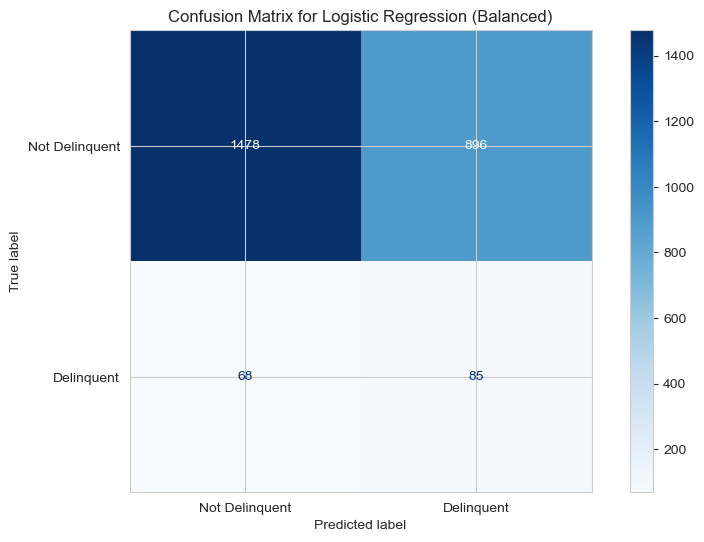


Training Random Forest with SMOTE...

--- Random Forest (SMOTE) Evaluation ---
Accuracy: 0.9395
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC Score: 0.5431


C:\Users\neeraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



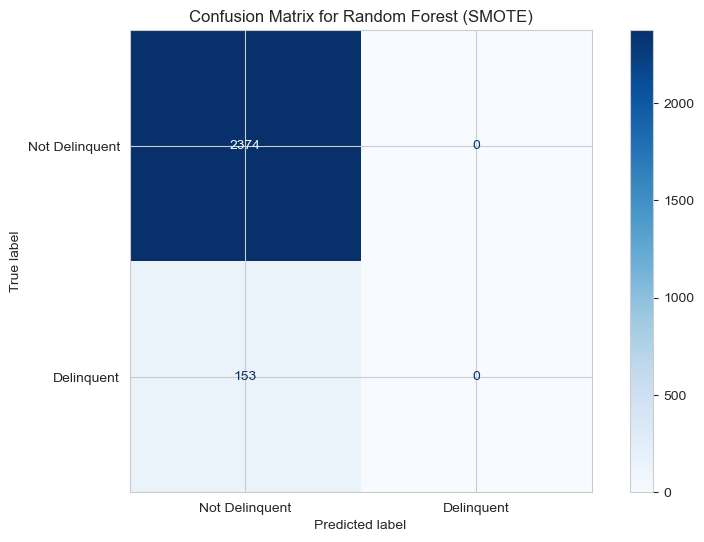


Scale pos weight for XGBoost: 15.44

Training XGBoost with Class Weights...


C:\Users\neeraj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[09:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





--- XGBoost (Class Weights) Evaluation ---
Accuracy: 0.9042
Precision: 0.0680
Recall: 0.0458
F1-Score: 0.0547
ROC AUC Score: 0.5429


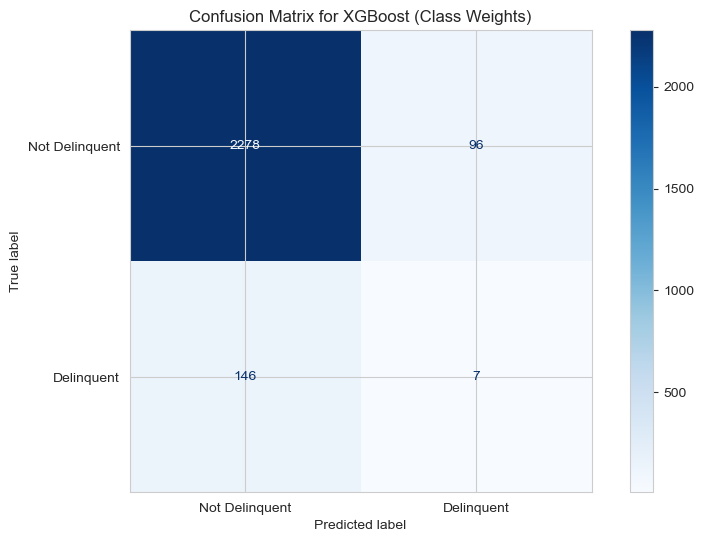


--- Top 15 Feature Importances (XGBoost) ---
                  Feature  Importance
73  cat__Week_Num_Week-52    0.019913
44  cat__Week_Num_Week-26    0.018887
45  cat__Week_Num_Week-27    0.017853
64  cat__Week_Num_Week-44    0.017445
63  cat__Week_Num_Week-43    0.016502
46  cat__Week_Num_Week-28    0.015805
35  cat__Week_Num_Week-18    0.015353
29  cat__Week_Num_Week-12    0.015078
55  cat__Week_Num_Week-36    0.014476
52  cat__Week_Num_Week-33    0.013697
12           num__Zipcode    0.013297
26   cat__Week_Num_Week-1    0.012898
58  cat__Week_Num_Week-39    0.012338
56  cat__Week_Num_Week-37    0.012309
70   cat__Week_Num_Week-5    0.012210


C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\neeraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



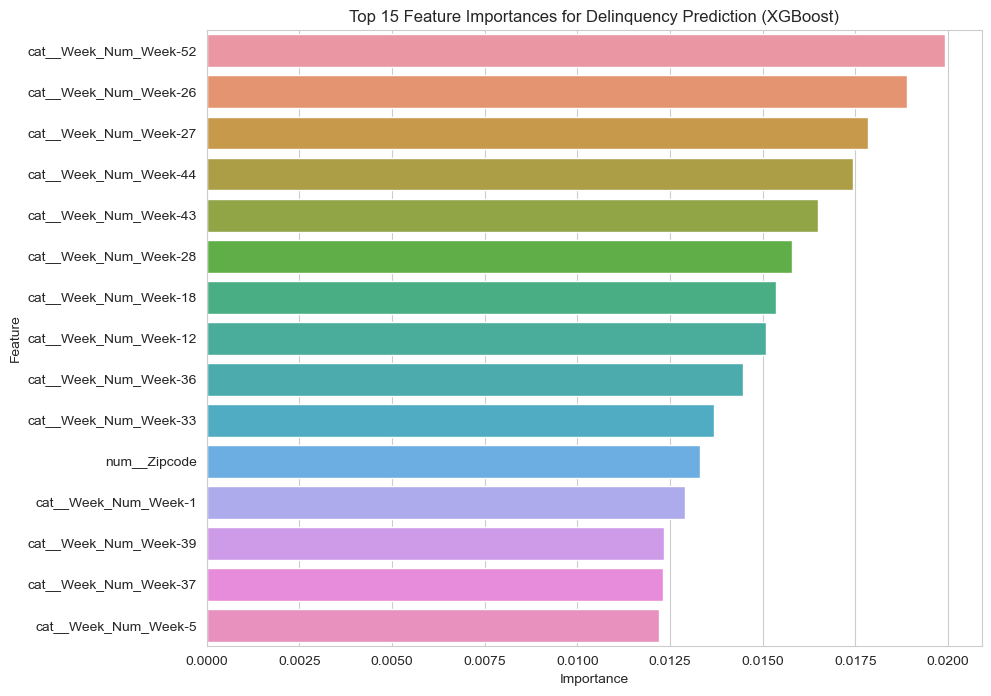

In [147]:
# --- Prepare Data for Modeling ---
# Define features (X) and target (y)
X = df.drop(columns=['Client_Num', 'Week_Start_Date', 'Card_Activation_Date_Proxy', 'Delinquent_Acc', 'Month_Year'])
y = df['Delinquent_Acc']

# Identify categorical and numerical features for preprocessing
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print(f"Categorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' for unseen categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Target shape: {y_test.shape}")
print(f"Delinquency proportion in training set: {y_train.value_counts(normalize=True)[1]:.2f}")
print(f"Delinquency proportion in test set: {y_test.value_counts(normalize=True)[1]:.2f}")

# --- Build and Evaluate Models ---

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of positive class

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Delinquent', 'Delinquent'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# --- Model 1: Logistic Regression with Imbalanced-learn Pipeline ---
# Use class_weight='balanced' for Logistic Regression to handle imbalance
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])

print("\nTraining Logistic Regression...")
pipeline_lr.fit(X_train, y_train)
evaluate_model(pipeline_lr, X_test, y_test, "Logistic Regression (Balanced)")

# --- Model 2: Random Forest with SMOTE ---
# SMOTE oversamples the minority class in the training data
smote = SMOTE(random_state=42)

pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', smote), # Apply SMOTE to the training data
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

print("\nTraining Random Forest with SMOTE...")
pipeline_rf.fit(X_train, y_train)
evaluate_model(pipeline_rf, X_test, y_test, "Random Forest (SMOTE)")

# --- Model 3: XGBoost with Class Weights ---
# Calculate scale_pos_weight for XGBoost
# It's (count_negative_samples / count_positive_samples)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"\nScale pos weight for XGBoost: {scale_pos_weight:.2f}")

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                     use_label_encoder=False, random_state=42,
                                     scale_pos_weight=scale_pos_weight)) # Apply class weight
])

print("\nTraining XGBoost with Class Weights...")
pipeline_xgb.fit(X_train, y_train)
evaluate_model(pipeline_xgb, X_test, y_test, "XGBoost (Class Weights)")

# --- Optional: Hyperparameter Tuning for the Best Model ---
# Example for XGBoost (can be time-consuming for large datasets)
# param_grid_xgb = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__learning_rate': [0.01, 0.05, 0.1],
#     'classifier__max_depth': [3, 5, 7]
# }
# grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
# grid_search_xgb.fit(X_train, y_train)
# print(f"\nBest XGBoost parameters: {grid_search_xgb.best_params_}")
# evaluate_model(grid_search_xgb.best_estimator_, X_test, y_test, "Tuned XGBoost")

# --- Model Interpretation (Example for XGBoost) ---
# To get feature importances from the trained pipeline, you need to access the trained preprocessor
# and the trained classifier separately.
if 'classifier' in pipeline_xgb.named_steps:
    final_xgb_model = pipeline_xgb.named_steps['classifier']
    feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

    if hasattr(final_xgb_model, 'feature_importances_'):
        importances = final_xgb_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        print("\n--- Top 15 Feature Importances (XGBoost) ---")
        print(feature_importance_df.head(15))

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
        plt.title('Top 15 Feature Importances for Delinquency Prediction (XGBoost)')
        plt.show()

In [138]:
import joblib
joblib.dump(pipeline_xgb, 'delinquency_prediction_model.pkl')

['delinquency_prediction_model.pkl']